# Regularized Linear Models - Ridge, Lasso

## 1.**Ridge Regression**

In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_boston

boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

C:\Users\82105\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_features = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


- alpha값 0,0.1,10,100,200 으로 변경하면서 RMSE측정

In [5]:
alphas = [0,0.1,10,50,100,200]
for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge,X_features,y_target,scoring='neg_mean_squared_error',cv=6)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 avg_rmse : {1:.3f}'.format(alpha,avg_rmse))

alpha 0일 때 avg_rmse : 5.696
alpha 0.1일 때 avg_rmse : 5.663
alpha 10일 때 avg_rmse : 5.479
alpha 50일 때 avg_rmse : 5.353
alpha 100일 때 avg_rmse : 5.318
alpha 200일 때 avg_rmse : 5.326


- 각 alpha에 따른 회귀계수 값 시각화

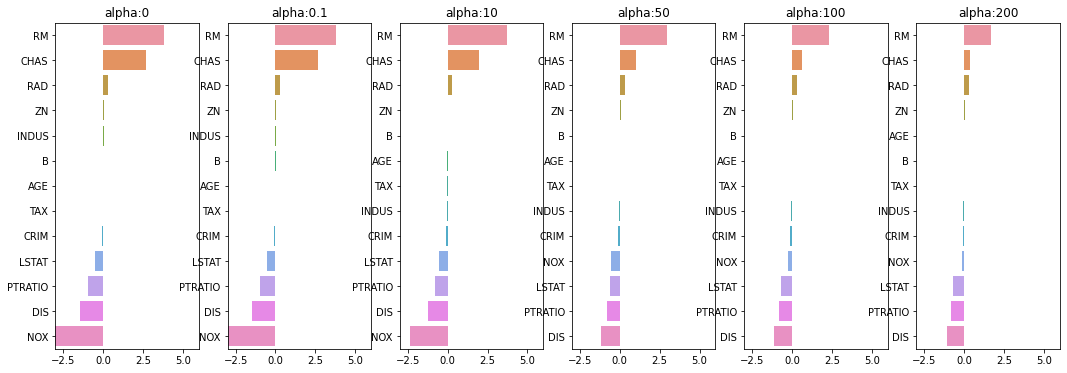

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
fig, axs = plt.subplots(figsize=(18,6),nrows=1,ncols=6)
coeff_df = pd.DataFrame()

for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_features , y_target)
    
    coeff = pd.Series(data=ridge.coef_ , index=X_features.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

- alpha값에 따른 column별 회귀계수 출력

In [22]:
ridge_alphas = [0,0.1,10,50,100,200]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:10,alpha:50,alpha:100,alpha:200
RM,3.809865,3.818233,3.702272,2.935628,2.334536,1.672973
CHAS,2.686734,2.670019,1.952021,1.006040,0.638335,0.377547
RAD,0.306049,0.303515,0.279596,0.300619,0.315358,0.327895
ZN,0.046420,0.046572,0.049579,0.052771,0.054496,0.055547
INDUS,0.020559,0.015999,-0.042962,-0.050937,-0.052826,-0.051809
B,0.009312,0.009368,0.010037,0.009744,0.009393,0.008949
AGE,0.000692,-0.000269,-0.010707,-0.004807,0.001212,0.009233
TAX,-0.012335,-0.012421,-0.013993,-0.015208,-0.015856,-0.016437
CRIM,-0.108011,-0.107474,-0.101435,-0.102263,-0.102202,-0.100830
LSTAT,-0.524758,-0.525966,-0.559366,-0.618128,-0.660764,-0.706464


## 2.**Lasso Regression**

In [13]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n = None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######',model_name,'######')
    for param in params:
        if model_name == 'Ridge':model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model,X_data_n,y_target_n,scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha{0}일 때 5폴드의 평균 RMSE:{1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index = X_data_n.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname] = coeff
            
    return coeff_df

In [16]:
lasso_alpha = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alpha,X_data_n=X_features, y_target_n=y_target)

####### Lasso ######
alpha0.07일 때 5폴드의 평균 RMSE:5.612
alpha0.1일 때 5폴드의 평균 RMSE:5.615
alpha0.5일 때 5폴드의 평균 RMSE:5.669
alpha1일 때 5폴드의 평균 RMSE:5.776
alpha3일 때 5폴드의 평균 RMSE:6.189


In [19]:
sort_column = 'alpha:'+str(lasso_alpha[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


## 3. **ElasticNet 회귀**

In [23]:
elastic_alpha=[0.07,0.1,0.5,2,5]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',params=elastic_alpha, X_data_n=X_features,y_target_n=y_target,)

####### ElasticNet ######
alpha0.07일 때 5폴드의 평균 RMSE:5.542
alpha0.1일 때 5폴드의 평균 RMSE:5.526
alpha0.5일 때 5폴드의 평균 RMSE:5.467
alpha2일 때 5폴드의 평균 RMSE:5.863
alpha5일 때 5폴드의 평균 RMSE:6.311


In [25]:
sort_column = 'alpha:'+str(elastic_alpha[0])
coeff_elastic_df.sort_values(by=sort_column,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:2,alpha:5
RM,3.574162,3.414154,1.918419,0.000000,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.228005,0.012039
ZN,0.050107,0.050617,0.052878,0.046443,0.041144
B,0.010122,0.010067,0.009114,0.007341,0.006531
AGE,-0.010116,-0.008276,0.007760,0.036511,0.037098
TAX,-0.014522,-0.014814,-0.016046,-0.014207,-0.007786
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.045477,-0.000000
NOX,-0.175072,-0.000000,-0.000000,-0.000000,0.000000


In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
 
def get_scaled_data(method='None', n_degree=None, in_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(in_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(in_data)
    elif method == 'Log':
        scaled_data = np.log1p(in_data)
    else:
        scaled_data = in_data

    if n_degree != None:
        scaled_data = PolynomialFeatures(degree=n_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [40]:
alphas = [0.1, 1, 10, 100]

scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_scaled = get_scaled_data(method=scale_method[0], n_degree=scale_method[1],in_data=X_features)
    print(X_scaled.shape, X_features.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)

(506, 13) (506, 13)

## 변환 유형:None, Polynomial Degree:None
alpha0.1일 때 5폴드의 평균 RMSE:5.788
alpha1일 때 5폴드의 평균 RMSE:5.653
alpha10일 때 5폴드의 평균 RMSE:5.518
alpha100일 때 5폴드의 평균 RMSE:5.330
(506, 13) (506, 13)

## 변환 유형:Standard, Polynomial Degree:None
alpha0.1일 때 5폴드의 평균 RMSE:5.826
alpha1일 때 5폴드의 평균 RMSE:5.803
alpha10일 때 5폴드의 평균 RMSE:5.637
alpha100일 때 5폴드의 평균 RMSE:5.421
(506, 104) (506, 13)

## 변환 유형:Standard, Polynomial Degree:2
alpha0.1일 때 5폴드의 평균 RMSE:8.827
alpha1일 때 5폴드의 평균 RMSE:6.871
alpha10일 때 5폴드의 평균 RMSE:5.485
alpha100일 때 5폴드의 평균 RMSE:4.634
(506, 13) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:None
alpha0.1일 때 5폴드의 평균 RMSE:5.764
alpha1일 때 5폴드의 평균 RMSE:5.465
alpha10일 때 5폴드의 평균 RMSE:5.754
alpha100일 때 5폴드의 평균 RMSE:7.635
(506, 104) (506, 13)

## 변환 유형:MinMax, Polynomial Degree:2
alpha0.1일 때 5폴드의 평균 RMSE:5.298
alpha1일 때 5폴드의 평균 RMSE:4.323
alpha10일 때 5폴드의 평균 RMSE:5.185
alpha100일 때 5폴드의 평균 RMSE:6.538
(506, 13) (506, 13)

## 변환 유형:Log, Polynomial Degree:None
alpha0.1일 때 5폴드의 평균 RMSE:4.770
alp